In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('energydata_complete.csv')

In [3]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [5]:
simple_linear_reg_df = df[['T2', 'T6']].sample(15, random_state=2)

<AxesSubplot: xlabel='T2', ylabel='T6'>

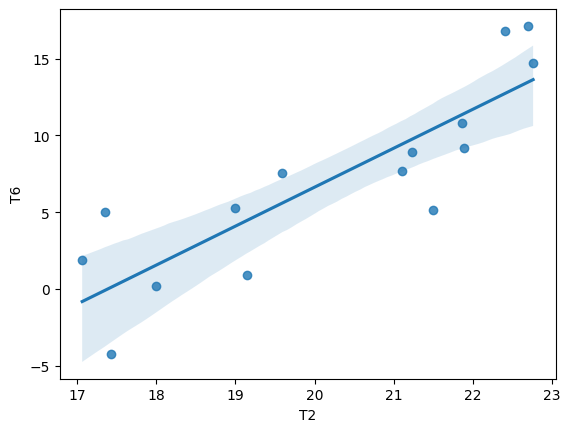

In [6]:
#regression plot
sns.regplot(x="T2", y="T6",
data=simple_linear_reg_df)

In [8]:
# splitting the data into x and y
x = df['T2']
y = df['T6']

<AxesSubplot: xlabel='T2', ylabel='T6'>

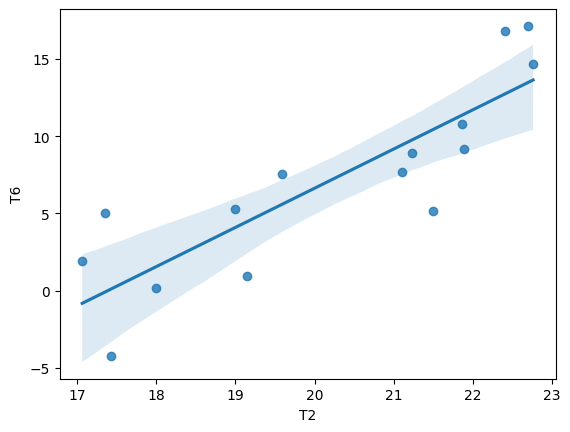

In [9]:
#regression plot
sns.regplot(x="T2", y="T6",
data=simple_linear_reg_df)

In [10]:
from sklearn.linear_model import LinearRegression

# Fit the model to the data
model = LinearRegression()
model.fit(x, y)

# Print the r-squared value
print(model.score(x, y))

ValueError: Expected 2D array, got 1D array instead:
array=[19.2        19.2        19.2        ... 25.62857143 25.414
 25.26428571].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [11]:
df = df.drop(['date','lights'], axis=1)


In [12]:
df.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [20]:
#Firstly, we normalise our dataset to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
features_df = normalised_df.drop(columns=['Appliances'])
heating_target = normalised_df['Appliances']


In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, heating_target,
test_size=0.3, random_state=1)

In [22]:
linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)
#obtain predictions
predicted_values = linear_model.predict(x_test)
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3) 

0.05

In [23]:
import numpy as np
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 3) 

46.095

In [24]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3) 

0.088

In [17]:
linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)


LinearRegression()

In [26]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.4)

In [28]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.088

In [29]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

In [30]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.088

In [32]:
#comparing the effects of regularisation
def get_weights_df(model, feat, col_name):
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df
linear_model_weights = get_weights_df(model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')
final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')


AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [33]:
from sklearn.linear_model import LinearRegression


In [34]:
# Import the LinearRegression class from scikit-learn
from sklearn.linear_model import LinearRegression

# Create a LinearRegression object
model = LinearRegression()

# Fit the model to the data
model.fit(x_train, y_train)

# Get the weights of the model
weights = pd.Series(model.coef_, x_train.columns).sort_values()

# Create a DataFrame with the weights
weights_df = pd.DataFrame(weights).reset_index()
weights_df.columns = ['Features', 'Linear_Model_Weight']


In [35]:
weights_df

,Features,Linear_Model_Weight
0,rv2,-3.248095e+11
1,RH_2,-4.585269e-01
2,T_out,-3.303225e-01
3,T2,-2.500735e-01
4,T9,-2.047224e-01
5,RH_8,-1.566142e-01
6,RH_out,-7.618322e-02
7,RH_7,-4.757651e-02
8,RH_9,-3.609650e-02
9,Press_mm_hg,4.682783e-03
